In [1]:
#Dataframe and math packages
import numpy as np
import pandas as pd

#Viz imports
import matplotlib.pyplot as plt
import seaborn as sns


#ML & eval imports
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

print('Setup complete')

Setup complete


In [2]:
train = pd.read_csv('train.csv')

In [3]:
test = pd.read_csv('test.csv')

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [7]:
train.duplicated().value_counts()

False    1460
dtype: int64

In [8]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

## Experiment 1

Okay, there are quite a few features to work with. Let's start off by conducting experiment 1 with the following criteria for features:

1.) They should anecdotally have a meaningful impact on housing prices. I.e. it's pretty easy to know that square feet should be pretty well correlated with price.

2.) Features shouldn't be colinear. This will be a little bit tricky since square feet and # of room are probably the two most useful predictors but are likely colinear.

3.) No more than three features- let's keep this modle simple/elegant and focus on getting into data exploration and analysis of our model.

4.) All features should be quantitative in nature.

It seems like central air would be a pretty useful indicator of a home's potential value as long as it's binary. Let's take a look at the distribution.

### E1 Data understanding

In [9]:
train.CentralAir.value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

Unfortunately it looks like so few houses were without it that it probably won't make for a great model without heavy resampling. We'll omit it for now but keep it in mind for further and more complicated models.

In [10]:
train.LotArea.describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

In [11]:
train.OverallQual.dtype

dtype('int64')

In [12]:
train.OverallQual.describe()

count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64

It looks like there is a pretty good spread of values and the average falls towards the center, we'll definitely consider using Overall Quality for our first model.

In [13]:
train['GarageCars'].describe()

count    1460.000000
mean        1.767123
std         0.747315
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: GarageCars, dtype: float64

First floor square feet seems like it should be pretty useful but may have a moderate correlation with lot area. We'll keep it in contention for the first model for now and see which one looks more useful.

In [14]:
train.GrLivArea.describe()

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

### Experiment 1 Features

IV: Square feet above grade (GRLivArea), Garage size in cars (GarageCars), and Overall Quality (OverallQual)

DV: Sale price (SalePrice)

In [15]:
#Create a new data frame that only has features relevant to this experiment
df1 = train[['GrLivArea', 'GarageCars', 'OverallQual', 'SalePrice']]

In [16]:
#Double check that our new data frame was successfully created
df1.head()

,GrLivArea,GarageCars,OverallQual,SalePrice
0,1710,2,7,208500
1,1262,2,6,181500
2,1786,2,7,223500
3,1717,3,7,140000
4,2198,3,8,250000


<AxesSubplot:>

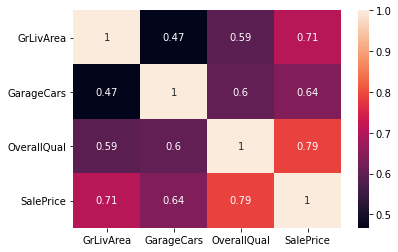

In [17]:
corr = df1.corr() # allows us to get the correlations
sns.heatmap(corr, annot=True) # annot=True adds the values

It looks like each feature is reasonably well correlated with price. Now that we've confirmed our variables let's finish preprocessing this data set.

#### E1 Data Viz

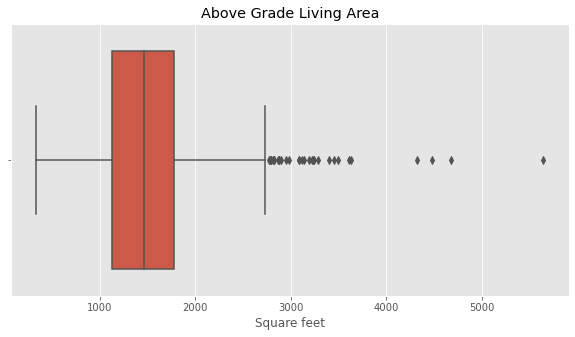

<Figure size 432x288 with 0 Axes>

In [18]:
#Visualize the distribution of living area square footage
plt.figure(figsize = (10,5))
plt.style.use('ggplot')

ax = sns.boxplot(x = 'GrLivArea', data = df1)
ax.set(title = 'Above Grade Living Area', xlabel = 'Square feet' )
plt.show()
plt.savefig('LivArea.png', bbox_inches = 'tight')


It looks like we'll have a significant amount of outliers, here's a note to figure out how to deal with them during preprocessing

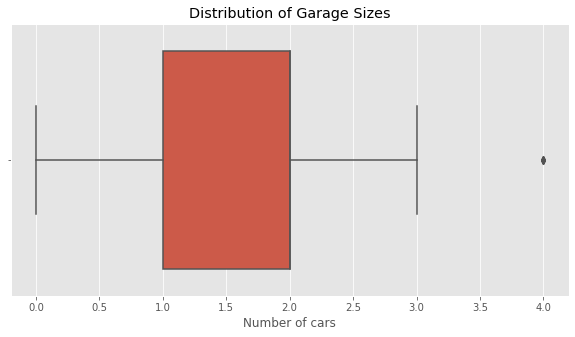

<Figure size 432x288 with 0 Axes>

In [19]:
#Visualize the distribution of garage sizes
plt.figure(figsize = (10,5))
plt.style.use('ggplot')

ax = sns.boxplot(x = 'GarageCars', data = df1)
ax.set(title = 'Distribution of Garage Sizes', xlabel = 'Number of cars' )
plt.show()
plt.savefig('GarageDist.png', bbox_inches = 'tight')

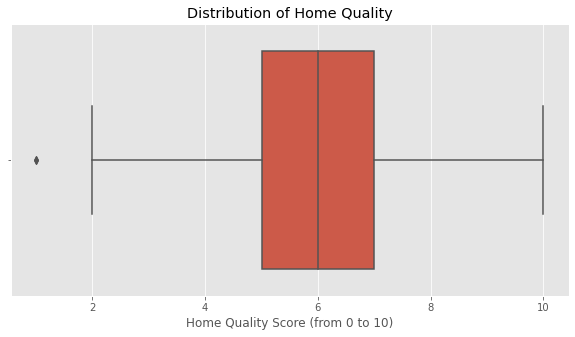

<Figure size 432x288 with 0 Axes>

In [20]:
#Visualize the distribution of home quality
plt.figure(figsize = (10,5))
plt.style.use('ggplot')

ax = sns.boxplot(x = 'OverallQual', data = df1)
ax.set(title = 'Distribution of Home Quality', xlabel = 'Home Quality Score (from 0 to 10)' )
plt.show()
plt.savefig('QualDist.png', bbox_inches = 'tight')

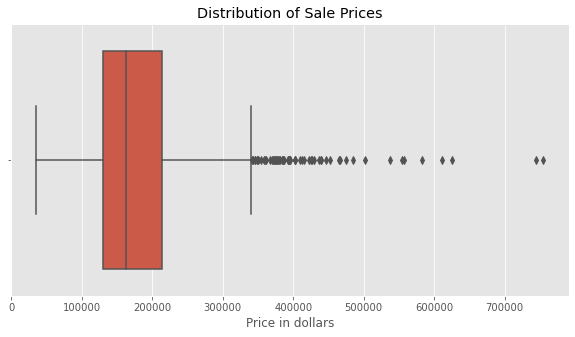

<Figure size 432x288 with 0 Axes>

In [21]:
#Visualize the distribution of sale price
plt.figure(figsize = (10,5))
plt.style.use('ggplot')

ax = sns.boxplot(x = 'SalePrice', data = df1)
ax.set(title = 'Distribution of Sale Prices', xlabel = 'Price in dollars' )
plt.show()
plt.savefig('SalePriceDist.png', bbox_inches = 'tight')

Sale price also seems to have a pretty significant number out outliers, let's make sure to address these during preprocessing

### E1 Data Preprocessing

In [22]:
#Check for NA values
df1.isna().sum()

GrLivArea      0
GarageCars     0
OverallQual    0
SalePrice      0
dtype: int64

Awesome, since we don't have any NA values we don't need to figure out what to do with them and can move on

In [23]:
#Check for duplicates
df1.duplicated().value_counts()

False    1458
True        2
dtype: int64

In [24]:
#Let's take a closer look at the observations marked as duplicates before we drop them
df1[df1.duplicated()]

,GrLivArea,GarageCars,OverallQual,SalePrice
831,1200,2,7,151000
1436,864,2,4,120500


Since the duplicate function only checks on one column and these don't appear to be true matches no further cleaning is necessary here.

Now it's time to handle the pesky outliers. The living area and square footage data both had a significant number of outliers and were right skewed. We'll start off by using log transformation on sales price and seeing whether it looks like an appropriate tool for this data.

In [25]:
df_sale_log = np.log(df1['SalePrice'])

In [26]:
df1['SalePrice'].head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [27]:
df_sale_log.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

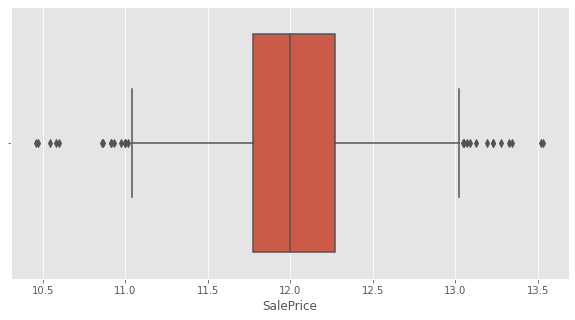

In [28]:
#Visualize the distribution of sale price
plt.figure(figsize = (10,5))
plt.style.use('ggplot')

ax = sns.boxplot(x = df_sale_log)
#ax.set(title = 'Distribution of Sale Prices', xlabel = 'Price in dollars' )
plt.show()
#plt.savefig('SalePriceDist.png', bbox_inches = 'tight')

The distribution of log transformed sale prices looks like it has a stronger central tendency and outliers appear to be reduced, however it's still a little bit troublesome. Let's try using SKLearn's minmax scaler to normalize the data.

***Note to go to office hours and figure out how best to handle outliers***

### E1 Modeling

In [29]:
#Initialize linear regression 
lin_reg = linear_model.LinearRegression()

In [30]:
#Set predictor features
x = df1[['GrLivArea', 'GarageCars', 'OverallQual']]

In [32]:
#Set target feature
y = np.log(df1['SalePrice'])

In [33]:
lin_reg.fit(x,y)

LinearRegression()

In [34]:
# The coefficients
print('Coefficients: \n', lin_reg.coef_)
print('Intercept: \n', lin_reg.intercept_)

Coefficients: 
 [0.00022158 0.13162094 0.14338043]
Intercept: 
 10.581139334718419


In [35]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [36]:
#Set the x_test df to make predictions since we didn't do this when we read in the set earlier
x_test = test[['GrLivArea', 'GarageCars', 'OverallQual']]

In [37]:
#Let's check our test set to make sure that our features don't have any NA values
x_test.isna().sum()

GrLivArea      0
GarageCars     1
OverallQual    0
dtype: int64

In [38]:
x_test = x_test.apply(lambda x: x.fillna(x.mean()),axis=0)

In [39]:
x_test.isna().sum()

GrLivArea      0
GarageCars     0
OverallQual    0
dtype: int64

In [40]:
# Make predictions using the testing set
y_pred = lin_reg.predict(x_test)

In [41]:
print(type(y_pred))

<class 'numpy.ndarray'>


In [42]:
#Create a DF to hold our submissio info
y_pred_df = pd.DataFrame()

In [43]:
#Add Id column in with ids from test set to conform with submission specs
y_pred_df['Id'] = test['Id']

In [44]:
#Add a sale price column with our predictions for submission
y_pred_df['SalePrice'] = np.exp(y_pred)

In [45]:
#Double check that our submission DF looks correct
y_pred_df.head()

,Id,SalePrice
0,1461,112218.085323
1,1462,142560.915920
2,1463,150578.471452
3,1464,172832.902141
4,1465,214282.169052


In [46]:
#Export our results to CSV for submission
y_pred_df.to_csv('y_pred.csv', index = False)

#### E1 Evaluation

RMSE: .19001

Office hours question: How do I find the R^2 value or perform other analytics without access to the y_test data?

## Experiment 2